<a href="https://colab.research.google.com/github/thiagomachado/optimization/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Computacional - Otimização 2022.2**

---


Jéssica Martins de Oliveira

Thiago Leal Damásio Machado

---


# Estudo da Função


$f({x_1},{x_2}) = \sqrt{{x_1}^2 + (e^{x_1} - {x_2})^2}$

$\Omega = {\rm I\!R}^2$

Domínio: $ \lbrace (x_1, x_2) \in {\rm I\!R}^2 : x_1^2+ e^{2x_1} + x_2^2 \ge 2e^{x_1}x_2   \rbrace $

A função $f(x,y)$ é contínua em todo o domínio. 

## Pontos críticos
### Condição Necessária de Primeira Ordem

Para encontrar os pontos críticos, vamos calcular o gradiente da função:

$$\nabla f(x_1,x_2) = \begin{pmatrix} \dfrac{\partial f}{\partial x_1}, \dfrac{\partial f}{\partial x_2} \end{pmatrix} $$

.

$$ \dfrac{\partial f}{\partial x_1} = \dfrac{- x_2 e^{x_1} + x_1 + e^{2x_1}}{\sqrt{x_1^2 - 2 x_2 e^{x_1} + e^{2x_1} + x_2^2}} $$

.

$$ \dfrac{\partial f}{\partial x_2} = - \dfrac{e^{x_1} - {x_2}}{\sqrt{x_1^2 + (e^{x_1} - {x_2})^2}} $$

.

$$\nabla f(x_1,x_2) = 0 $$

. Igualando a segunda derivada parcial a 0:

$$ - \dfrac{e^{x_1} - {x_2}}{\sqrt{x_1^2 + (e^{x_1} - {x_2})^2}} = 0 $$
$$ {e^{x_1} - {x_2}} = 0 $$
$$  {x_2} = {e^{x_1}} $$

. Igualando a primeira derivada parcial a 0: 

$$ \dfrac{- x_2 e^{x_1} + x_1 + e^{2x_1}}{\sqrt{x_1^2 - 2 x_2 e^{x_1} + e^{2x_1} + x_2^2}} = 0 $$
$$ {- x_2 e^{x_1} + x_1 + e^{2x_1}} = 0 $$
Substituindo $ {x_2} = {e^{x_1}} $
$$ {-  {e^{x_1}} e^{x_1} + x_1 + e^{2x_1}} = 0 $$
$$ x_1 = 0 $$
$$ {x_2} = 1 $$


O único ponto crítico é: $(0, 1)$

In [3]:
import math
import sys
import random
import time

import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

def get_function_value(x, x2):
  aux = np.subtract(np.exp(x),x2)
  
  return np.sqrt(x**2 + aux**2)


def get_function_gradient(x, x2):
  partial_x1_derivative = (-np.exp(x) * x2 + x + np.exp(2*x))/np.sqrt(x**2-2*np.exp(x)*x2+np.exp(2*x)+x2**2)
  partial_x2_derivative = -(np.exp(x) - x2)/np.sqrt(x**2 + (np.exp(x)-x2)**2)
  
  return np.array([[partial_x1_derivative],[partial_x2_derivative]])
  

def get_function_hessian_matrix(x, x2):
  hessian_11 = (2*np.exp(x)*(np.exp(x)-x2)+2*np.exp(2*x)+2)/np.sqrt(x**2+(np.exp(x)-x2)) - (2*np.exp(x) * (np.exp(x)- x2) +2*x)**2/4*(x**2+(np.exp(x)-x2)**2)**(3/2) 
  hessian_12 = (2*np.exp(x)*(np.exp(x)-x2)+2*x) * (np.exp(x)-x2)/(2*(x**2+(np.exp(x)-x2)**2)**(3/2)) - np.exp(x)/np.sqrt(x**2+(np.exp(x)-x2)**2)
  hessian_21 = hessian_12
  hessian_22 = 1/np.sqrt(x**2+(np.exp(x)-x2)**2) - (np.exp(x)-x2)**2/(x**2 + (np.exp(x)-x2)**2)**(3/2)
  
  return np.array([[hessian_11, hessian_12],[hessian_21, hessian_22 ]])



## Gráfico da função

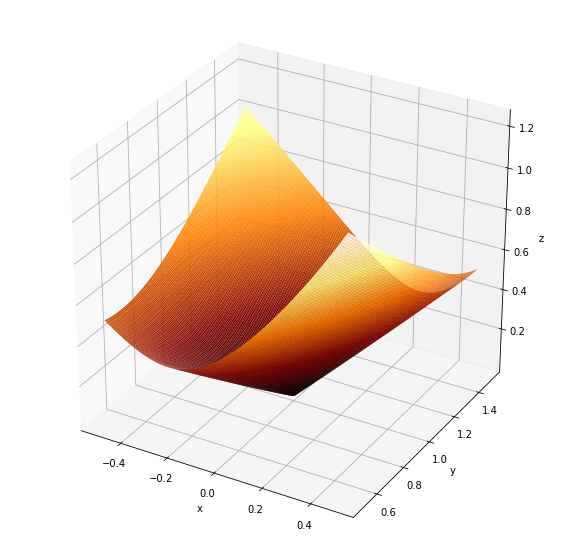

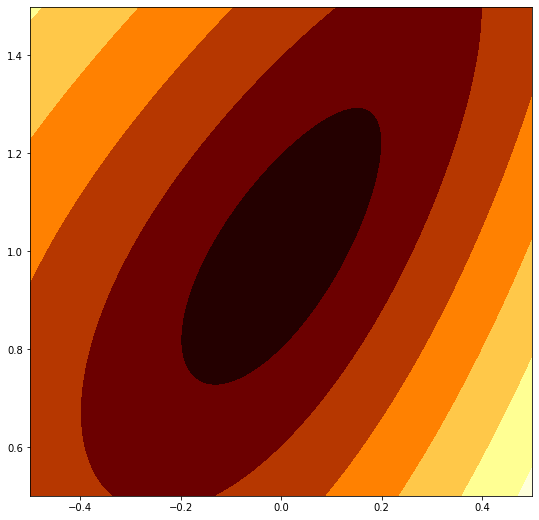

In [2]:

#plot 3d
x = np.linspace(-0.5,0.5,150)
y = np.linspace(0.5,1.5,150)
X, Y = np.meshgrid(x, y)
Z = get_function_value(X, Y)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none', cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

#curvas de nível
fig = plt.figure(figsize=(9,9))
plt.contourf(X,Y,Z, cmap='afmhot')
plt.show()

# Métodos

## Condições de Parada
Número de Iterações = 100

Erro de Aproximação = $10^{-7}$ 

In [4]:

max_iter = 100
min_err = 0.0000001

points = [[-0.414314213,	0.643231],
          [-0.34312341, 0.5765879],
          [-0.2, 0.8],
          [0.4, 1.5],
          [0.3, 1.4],
          [0.5, 1.4132]]

## Funções Auxiliares

In [21]:
def transpose_matrix(matrix):
  matrix = np.array(matrix)
  return matrix.transpose()

def get_inverse_matrix(matrix):
  a, b = matrix[0]
  c, d = matrix[1]
  det = a * d - c * d
  inverse = (1 / det) * np.array([[d, -b], [-c, a]])
  return inverse

def is_positive_definite(matrix):
  if np.array_equal(x, x.T): 
    eigenvalues = np.linalg.eigvals(matrix)
    if all(i > 0 for i in eigenvalues):
      return True
  else:
    return False


## Busca de Armijo

In [12]:
def armijo_search(x, y, direction_x, direction_y):
  penalty = 0.9 
  control = 0.25 
  dot = lambda x0, y0, x1, y1: x0 * x1 + y0 * y1
  
  grad_x, grad_y = get_function_gradient(x, y)[0][0], get_function_gradient(x, y)[1][0]
  num_calls = 0
  t = 1
  while (get_function_value(x + t * direction_x, y + t * direction_y)
    > get_function_value(x, y) + control * t * dot(grad_x, grad_y, direction_x, direction_y)):
        t *= penalty
        num_calls += 1
  
  return t, num_calls

## Método Gradiente


In [7]:
def gradient_method(x, y):
  iteration_count = 0
  
  grad_x, grad_y = get_function_gradient(x, y)[0][0], get_function_gradient(x, y)[1][0]
  variation_x, variation_y = sys.maxsize, sys.maxsize

  sum_num_calls = 0
  
  while (iteration_count < max_iter
          and (abs(variation_x) > min_err or abs(variation_y) > min_err)):
          
          direction_x, direction_y = -1 * grad_x, -1 * grad_y 
          t, num_calls = armijo_search(x, y, direction_x, direction_y)
          sum_num_calls += num_calls
          
          x0, y0 = x, y
          x, y = x + t * direction_x, y + t * direction_y           
          variation_x, variation_y = x - x0, y - y0
          iteration_count += 1
          grad_x, grad_y = get_function_gradient(x, y)[0][0], get_function_gradient(x, y)[1][0]
  
  return x, y, iteration_count, sum_num_calls, variation_x, variation_y

## Método de Newton

In [19]:
def newton_method(x, y): 
  iteration_count = 0
  
  grad_x, grad_y = get_function_gradient(x, y)[0][0], get_function_gradient(x, y)[1][0]
  variation_x, variation_y = sys.maxsize, sys.maxsize
  
  sum_num_calls = 0
  
  while (iteration_count < max_iter and (abs(variation_x) > min_err or abs(variation_y) > min_err)):
    hessian = get_function_hessian_matrix(x, y)
    
    if (is_positive_definite(hessian)): 
        
      grad = get_function_gradient(x,y) 
      
     
      direction_x, direction_y = -1 * get_inverse_matrix(hessian).dot(grad)
      t, num_calls = armijo_search(x, y, direction_x, direction_y)
      sum_num_calls += num_calls
      
      x0, y0 = x, y
      x, y = x + t * direction_x, y + t * direction_y
      x, y = x[0], y[0]
      variation_x, variation_y = x - x0, y - y0
      grad_x, grad_y = get_function_gradient(x, y)[0][0], get_function_gradient(x, y)[1][0]
      iteration_count += 1
    else:      
      if (iteration_count == 0):
        print('Initial Hessian is not a positive-definite matrix, stop method. \
        \nPoints: {points}\n'.format(points = (x,y)))
      break
  
  return x, y, iteration_count, sum_num_calls, variation_x, variation_y

## Método Quase Newton

In [23]:
def quasi_newton_method(x, y):     
  iteration_count = 0 
  
  grad_x0 = get_function_gradient(x, y)
  x = np.array([x, y])
  inv_hessian_approx = np.array([[1, 0], [0, 1]]) 
  
  gradient_variation = np.array([[sys.maxsize], [sys.maxsize]]) 
  variation = np.array([[sys.maxsize], [sys.maxsize]])

  sum_num_calls = 0
  
  while (iteration_count < max_iter and (abs(variation[0][0]) > min_err or abs(variation[1][0]) > min_err)):      
      direction = -1 * inv_hessian_approx.dot(grad_x0) 
      step, num_calls = armijo_search(x[0], x[1], direction[0], direction[1])
      sum_num_calls += num_calls
      
      x0 = x
      x = [x[0] + step * direction[0][0], x[1] + step * direction[1][0]]
      variation = np.array([[x[0] - x0[0], x[1] - x0[1]]]).transpose()

      grad_x = get_function_gradient(x[0], x[1])
      gradient_variation = grad_x - grad_x0
      grad_x0 = grad_x
      
      
      a = 1 + ((gradient_variation.transpose().dot(inv_hessian_approx)).dot(gradient_variation))[0][0] \
                / ((variation.transpose()).dot(gradient_variation))[0][0]

      b = variation.dot(variation.transpose()) / (variation.transpose().dot(gradient_variation))[0][0]
      
      c = ((variation.dot(gradient_variation.transpose())).dot(inv_hessian_approx) \
                + inv_hessian_approx.dot(gradient_variation).dot(variation.transpose())) \
                  / ((variation.transpose()).dot(gradient_variation))[0][0]
      
      # Approximation by BFGS method
      inv_hessian_approx = inv_hessian_approx + a * b - c
      iteration_count += 1
  
  return x[0], x[1], iteration_count, sum_num_calls, variation[0][0], variation[1][0]


# Resultados

In [41]:
def get_results(x, y, minimize_function):
  new_x, new_y, iteration_count, num_calls, variation_x, variation_y = minimize_function(x, y)
  value = get_function_value(new_x, new_y)
  new_grad_x, new_grad_y = get_function_gradient(new_x,new_y)[0][0], get_function_gradient(new_x,new_y)[1][0]
  absolute = math.sqrt(variation_x ** 2 + variation_y ** 2)
  return [x, y, iteration_count, num_calls, new_x, new_y, value, absolute]

def print_result_table(results):
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', 1000)
  pd.option_context('display.colheader_justify','left')
  pd.set_option("display.precision", 15)

  table = {
    'Ponto Inicial': [], 
    '# de Iterações':[],
    '# de cham. Armijo':[],
    'Ponto Ótimo':[],
    'Valor Ótimo':[],
    'Erro de Aproximação':[]
  }

  for result in results:
    table['Ponto Inicial'].append((result[0], result[1]))
    table['# de Iterações'].append(result[2])
    table['# de cham. Armijo'].append(result[3])
    table['Ponto Ótimo'].append((result[4], result[5]))
    table['Valor Ótimo'].append(result[6])
    table['Erro de Aproximação'].append(result[7])
  display(
      (pd.DataFrame(table, columns = table.keys()))
      .style.hide_index()
      .set_properties(**{'text-align': 'center'})
  )

In [43]:
methods = [{"name": "Gradient", "func": gradient_method},
            {"name": "Newton", "func": newton_method},
            {"name": "Quasi-Newton", "func": quasi_newton_method}]

for method in methods:
    start_time = time.time()
    print("\n{method_name} Method\n".format(method_name = method["name"]))
    print_result_table([get_results(point[0], point[1], method["func"]) for point in points])
    
    
    print("\nTotal running time: {time} s.".format(time = round(time.time() - start_time,4)))
    print("\n____________________________________________________________________________________________________________________")
    


Gradient Method



Ponto Inicial,# de Iterações,# de cham. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação
"(-0.414314213, 0.643231)",51,4333,"(-2.602170766353938e-08, 0.9999998878119197)",0.000000090009850,0.000000094099071
"(-0.34312341, 0.5765879)",49,4257,"(-2.752741042302445e-08, 0.9999998786363998)",0.000000097790536,0.000000097270961
"(-0.2, 0.8)",49,4284,"(-3.194344206372153e-08, 0.9999998827226684)",0.000000091116718,0.000000091989929
"(0.4, 1.5)",54,4352,"(9.988173299507648e-08, 1.0000000854134101)",0.000000100924195,0.000000105607111
"(0.3, 1.4)",52,4255,"(1.1209293301947266e-07, 1.000000102490552)",0.000000112503473,0.000000112398142
"(0.5, 1.4132)",54,4355,"(9.986815101705412e-08, 1.0000000848672013)",0.000000100988496,0.000000105583432



Total running time: 0.3537 s.

____________________________________________________________________________________________________________________

Newton Method



Ponto Inicial,# de Iterações,# de cham. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação
"(-0.414314213, 0.643231)",59,0,"(-3.8438178534636085e-07, 0.9999996156182814)",0.000000384381785,0.000000139183940
"(-0.34312341, 0.5765879)",58,0,"(-3.649038925872737e-07, 0.9999996350961675)",0.000000364903893,0.000000132114758
"(-0.2, 0.8)",57,0,"(-3.424890860883619e-07, 0.9999996575109669)",0.000000342489086,0.000000124040762
"(0.4, 1.5)",64,0,"(3.478118353023626e-07, 1.00000034781189)",0.000000347811835,0.000000125786419
"(0.3, 1.4)",62,0,"(3.7635250045500256e-07, 1.0000003763525644)",0.000000376352500,0.000000136298360
"(0.5, 1.4132)",65,0,"(3.73243965143498e-07, 1.000000373244028)",0.000000373243965,0.000000134979672



Total running time: 0.1189 s.

____________________________________________________________________________________________________________________

Quasi-Newton Method



Ponto Inicial,# de Iterações,# de cham. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação
"(-0.414314213, 0.643231)",33,123,"(2.2598477581114244e-08, 0.9999999877246263)",0.000000041555706,0.000000111768461
"(-0.34312341, 0.5765879)",33,122,"(1.3201636454813843e-08, 0.9999999699053508)",0.000000045264241,0.000000099729714
"(-0.2, 0.8)",32,140,"(2.8229197394714883e-08, 1.0000000431365534)",0.000000031923609,0.000000078140230
"(0.4, 1.5)",31,130,"(4.997420905521478e-08, 1.000000048066085)",0.000000050010624,0.000000070016693
"(0.3, 1.4)",31,136,"(3.26567486137556e-08, 1.0000000058427054)",0.000000042254659,0.000000133501753
"(0.5, 1.4132)",30,192,"(-4.196898579645486e-09, 1.0000000260321995)",0.000000030519049,0.000000049315878



Total running time: 0.0651 s.

____________________________________________________________________________________________________________________
